In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve

In [2]:
def load_tic_toe_data(data_path='./data/tic-tac-toe/tic-tac-toe.data'):
    return pd.read_csv(data_path)

In [3]:
tic_tac_toe_data = load_tic_toe_data()
for col_name in tic_tac_toe_data.columns:
#     print(tic_tac_toe_data[col_name].dtype)
    if(tic_tac_toe_data[col_name].dtype == 'object'):
        tic_tac_toe_data[col_name]= tic_tac_toe_data[col_name].astype('category')
        tic_tac_toe_data[col_name] = tic_tac_toe_data[col_name].cat.codes
tic_tac_toe_data.describe()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.221526,1.132706,1.221526,1.132706,1.311390,1.133751,1.221526,1.133751,1.222571,0.653083
std,0.775566,0.798892,0.775566,0.798892,0.741201,0.799372,0.775566,0.799372,0.775941,0.476238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [4]:
X = tic_tac_toe_data.iloc[:, np.r_[0:9]]
y = tic_tac_toe_data.iloc[:, np.r_[9:10]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
# C_range = 10. ** np.arange(-3, 8)
# gamma_range = 10. ** np.arange(-5, 4)
n_range = range(1, 10, 2)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
param_grid = {"base_estimator__max_depth":n_range, "n_estimators":range(1, 1000, 100)}
grid = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)

print("The best classifier is: ", grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   21.1s finished


The best classifier is:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=201)


In [5]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=201, random_state=42)
clf.fit(X_train, y_train)

C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=201, random_state=42)

In [15]:
cross_val_score(clf, X_train, y_train, cv=5)

array([1., 1., 1., 1., 1.])

In [17]:
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
# train_precision = precision_score(y_train, tree_clf.predict(X_train))
# test_precision = precision_score(y_test, tree_clf.predict(X_test))
print(train_accuracy)
print(test_accuracy)
train_precision = precision_score(y_train, clf.predict(X_train))
test_precision = precision_score(y_test, clf.predict(X_test))
print(train_precision, test_precision)

1.0
1.0
1.0 1.0


[learning_curve] Training set sizes: [ 57 187 316 446 576]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished


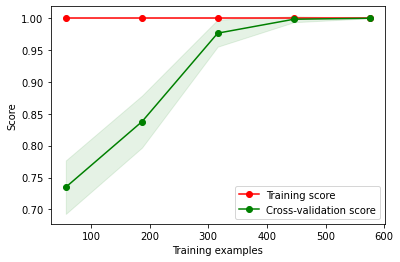

In [18]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, random_state=42, n_jobs=-1, verbose=2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished


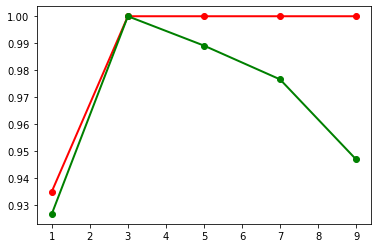

In [19]:
lw = 2
max_depth_range = range(1,10, 2)
train_scores, test_scores = validation_curve(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42), X_train, y_train, param_name="base_estimator__max_depth", param_range=max_depth_range, scoring="accuracy", cv=10, n_jobs=-1, verbose=2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_depth_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_depth_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 300 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.6s finished


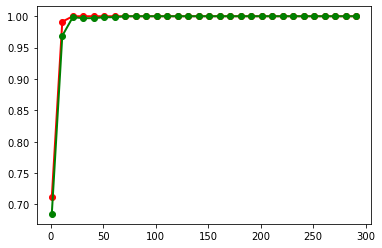

In [11]:
lw = 2
estimators_range = range(1,300, 10)
train_scores, test_scores = validation_curve(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), random_state=42), X_train, y_train, param_name="n_estimators", param_range=estimators_range, scoring="accuracy", cv=10, n_jobs=-1, verbose=2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(estimators_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(estimators_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

In [9]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       214

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316

[[102   0]
 [  0 214]]


In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
mnist_X, mnist_y = mnist["data"], mnist["target"].astype(np.uint8)
print(mnist_X.shape, mnist_y.shape)

(70000, 784) (70000,)


In [15]:
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, test_size=.33, random_state=42)

In [28]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
# C_range = 10. ** np.arange(-3, 8)
# gamma_range = 10. ** np.arange(-5, 4)
n_range = range(1, 10, 2)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
param_grid = {"base_estimator__max_depth":n_range, "n_estimators":range(1, 1000, 100)}
grid = RandomizedSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_distributions=param_grid, cv=cv, n_jobs=-1, verbose=2)

grid.fit(mnist_X_train, mnist_y_train)

print("The best classifier is: ", grid.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 91.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 217.9min finished


The best classifier is:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   n_estimators=601)


In [21]:
mnist_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9), n_estimators=601, random_state=42)
mnist_clf.fit(mnist_X_train, mnist_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   n_estimators=601, random_state=42)

In [19]:
cross_val_score(mnist_clf, mnist_X_train, mnist_y_train, cv=3)

array([0.84450556, 0.83809889, 0.84718224])

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(mnist_clf, mnist_X_train, mnist_y_train, cv=3, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

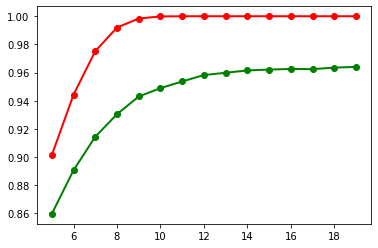

In [20]:
lw = 2
max_depth_range = range(2,12, 1)
train_scores, test_scores = validation_curve(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=601, random_state=42), mnist_X_train, mnist_y_train, param_name="base_estimator__max_depth", param_range=max_depth_range, scoring="accuracy", cv=3, n_jobs=-1, verbose=2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_depth_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_depth_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

In [16]:
lw = 2
estimators_range = range(50, 800, 25)
train_scores, test_scores = validation_curve(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9), n_estimators=601, random_state=42), mnist_X_train, mnist_y_train, param_name="n_estimators", param_range=estimators_range, scoring="accuracy", cv=3, n_jobs=-1, verbose=2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(estimators_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(estimators_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  90 | elapsed: 141.0min remaining: 141.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 295.2min finished


NameError: name 'max_depth_range' is not defined

<Figure size 432x288 with 0 Axes>

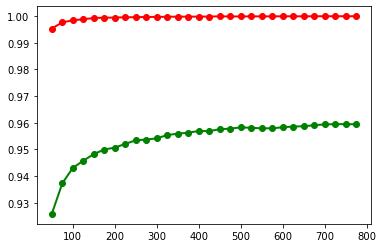

In [17]:
plt.plot(estimators_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(estimators_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

In [22]:
predictions = mnist_clf.predict(mnist_X_test)
print(classification_report(mnist_y_test, predictions))
print(confusion_matrix(mnist_y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2267
           1       0.99      0.99      0.99      2603
           2       0.95      0.95      0.95      2350
           3       0.95      0.95      0.95      2383
           4       0.96      0.96      0.96      2144
           5       0.95      0.96      0.95      2107
           6       0.99      0.97      0.98      2294
           7       0.97      0.96      0.96      2455
           8       0.93      0.95      0.94      2196
           9       0.91      0.96      0.94      2301

    accuracy                           0.96     23100
   macro avg       0.96      0.96      0.96     23100
weighted avg       0.96      0.96      0.96     23100

[[2194    0   16    2    5   21    6    2   18    3]
 [   0 2566    8   10    2    2    1    4    4    6]
 [   1    8 2243   16    9    5    9   15   38    6]
 [   3    1   25 2258    1   30    3   14   27   21]
 [   2    2    7    0 2055   